In [31]:
import pandas as pd
import numpy as np
from numpy import nan as NA
from collections import Counter
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Import the data

In [32]:
train_input = pd.read_csv("train.csv")
test_input = pd.read_csv("test.csv")

In [33]:
print(train_input.columns)
print(test_input.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [34]:
train_input.shape

(891, 12)

In [35]:
test_input.shape

(418, 11)

In [36]:
train_input.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train_input.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
train_input['Age'][train_input['Age'].isnull()] =28

In [39]:
train_input.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
train_input['Embarked'] = train_input['Embarked'].fillna('S')

In [41]:
train_input.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
train_input = train_input.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_input.head()
   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
train_input.shape

(891, 8)

In [44]:
train_input.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
train_input['Sex'] = le.fit_transform(train_input['Sex'])
train_input = pd.get_dummies(train_input, columns = ['Embarked'])
train_input.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [47]:
train_input

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [48]:
X = train_input.drop('Survived', axis = 1)
y = train_input.Survived

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train ,y_test = train_test_split(X,y)

In [51]:
X_train.shape

(668, 9)

In [52]:
X_test.shape

(223, 9)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X)

StandardScaler()

In [56]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn import svm

In [58]:
clf = svm.SVC(kernel='linear',C = 1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
predictions = clf.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(confusion_matrix(y_test,predictions))

[[113  19]
 [ 30  61]]


In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       132
           1       0.76      0.67      0.71        91

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



# Here we have applied multiple Models to achieve different Accuracies.

In [91]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algorithm':model_names,'Accuracy':acc}
d

{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.8071748878923767,
  0.8161434977578476,
  0.8251121076233184,
  0.8161434977578476,
  0.8161434977578476,
  0.757847533632287,
  0.8071748878923767,
  0.8026905829596412]}

In [92]:
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by = 'Accuracy', ascending = False)

,Modelling Algorithm,Accuracy
2,rbfSVM,0.825112
1,LinearSVM,0.816143
3,KNearestNeighbors,0.816143
4,RandomForestClassifier,0.816143
0,LogisticRegression,0.807175
6,GradientBoostingClassifier,0.807175
7,GaussianNB,0.802691
5,DecisionTree,0.757848


In [63]:
test_input.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
test_input['Age'][test_input['Age'].isnull()] =28

In [65]:
test_input.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
test_input['Fare'] = test_input['Fare'].fillna(test_input['Fare'].median())

In [67]:
test_input.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [68]:
test_input = test_input.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_input.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [69]:
test_input['Sex'] = le.fit_transform(test_input['Sex'])
test_input = pd.get_dummies(test_input, columns = ['Embarked'])
test_input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,28.0,0,0,8.0500,0,0,1


In [70]:
predictions = clf.predict(test_input)

In [71]:
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(X, y)

GradientBoostingClassifier()

In [74]:
test_predicted = gbc.predict(test_input)

In [75]:
test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# My Visualization Skills

In [78]:
train_input = pd.read_csv("train.csv")
test_input = pd.read_csv("test.csv")

In [79]:
print(train_input.columns)
print(test_input.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


0    549
1    342
Name: Survived, dtype: int64


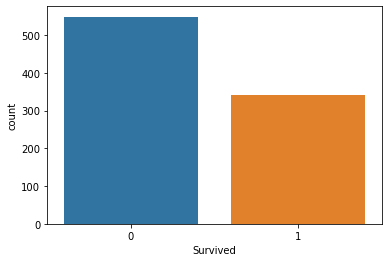

In [80]:
print(train_input['Survived'].value_counts())
sns.countplot(x=train_input['Survived'])

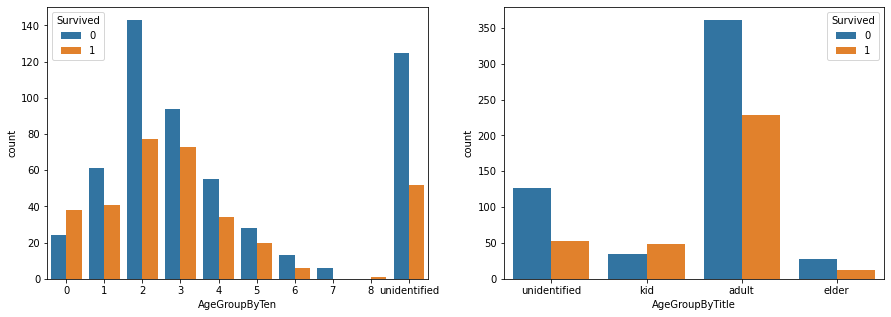

In [81]:
def groupAgeByTen (row) :
    if (np.isnan(row.Age)) :
        return 'unidentified'
    return int(row.Age / 10)
train_input['AgeGroupByTen'] = train_input.apply(groupAgeByTen, axis=1)
train_input['AgeGroupByTen'] = train_input['AgeGroupByTen'].astype('category')

def groupAgeByTitle (row) :
    if (row.Age < 16) :
        return 1
    if (row.Age >= 16 and row.Age < 55) :
        return 2
    if (row.Age > 55) :
        return 3
    return 0
train_input['AgeGroupByTitle'] = train_input.apply(groupAgeByTitle, axis=1)
train_input['AgeGroupByTitle'] = train_input['AgeGroupByTitle'] \
    .astype('category') \
    .cat \
    .rename_categories(['unidentified', 'kid', 'adult', 'elder'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='AgeGroupByTen', hue='Survived', data=train_input, ax=axes[0])
sns.countplot(x='AgeGroupByTitle', hue='Survived', data=train_input, ax=axes[1])

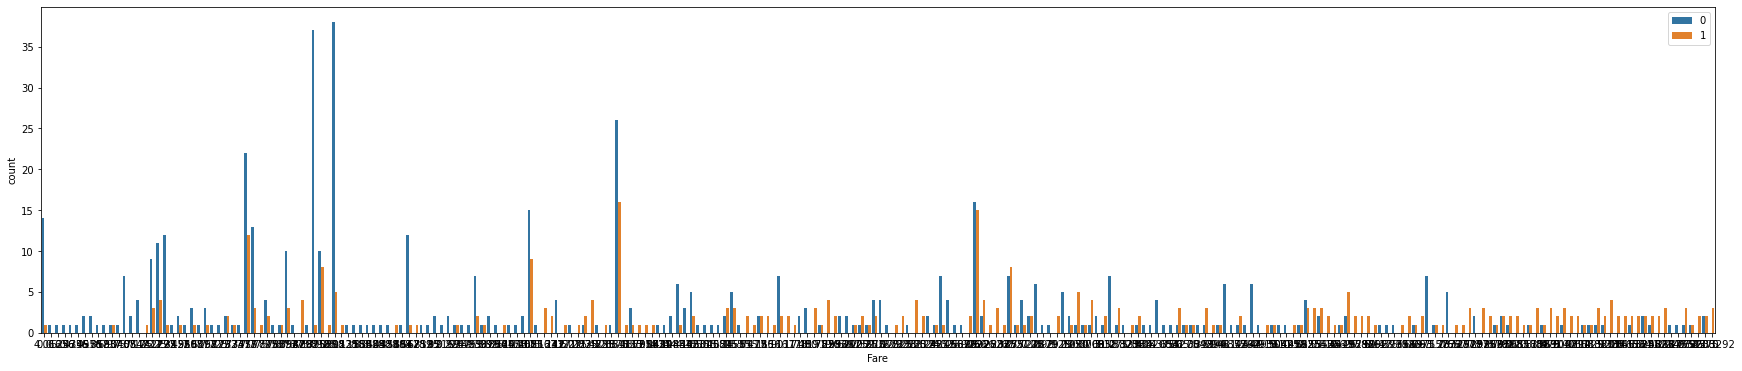

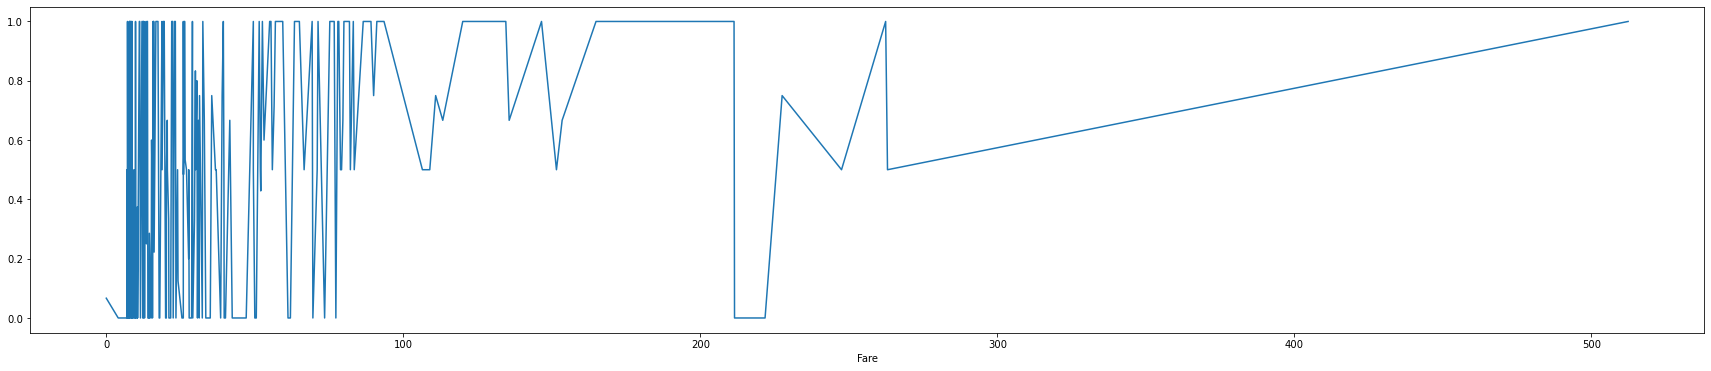

In [82]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Fare', hue='Survived', data=train_input)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(30, 6))
train_input.groupby('Fare').mean()['Survived'].plot()
plt.show()

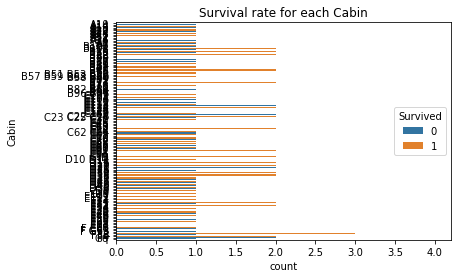

In [83]:
plt.title('Survival rate for each Cabin')
sns.countplot(y='Cabin', hue='Survived', data=train_input.sort_values('Cabin'), orient='h')

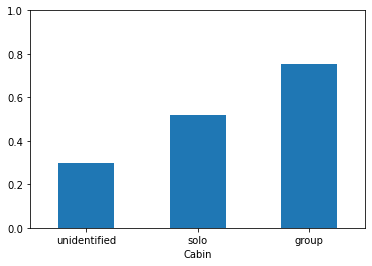

In [84]:
def groupCabin (row) :
    if (pd.isna(row.Cabin)) :
        return 0
    if (pd.concat([train_input['Cabin'], test_input['Cabin']]).value_counts()[row.Cabin] > 1) :
        return 2
    return 1

train_input['Cabin'] = train_input.apply(groupCabin, axis=1)
train_input['Cabin'] = train_input['Cabin'] \
    .astype('category') \
    .cat \
    .rename_categories(['unidentified', 'solo', 'group'])

g = train_input.groupby('Cabin').mean()['Survived'].plot.bar()
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.ylim(top=1)
plt.show()

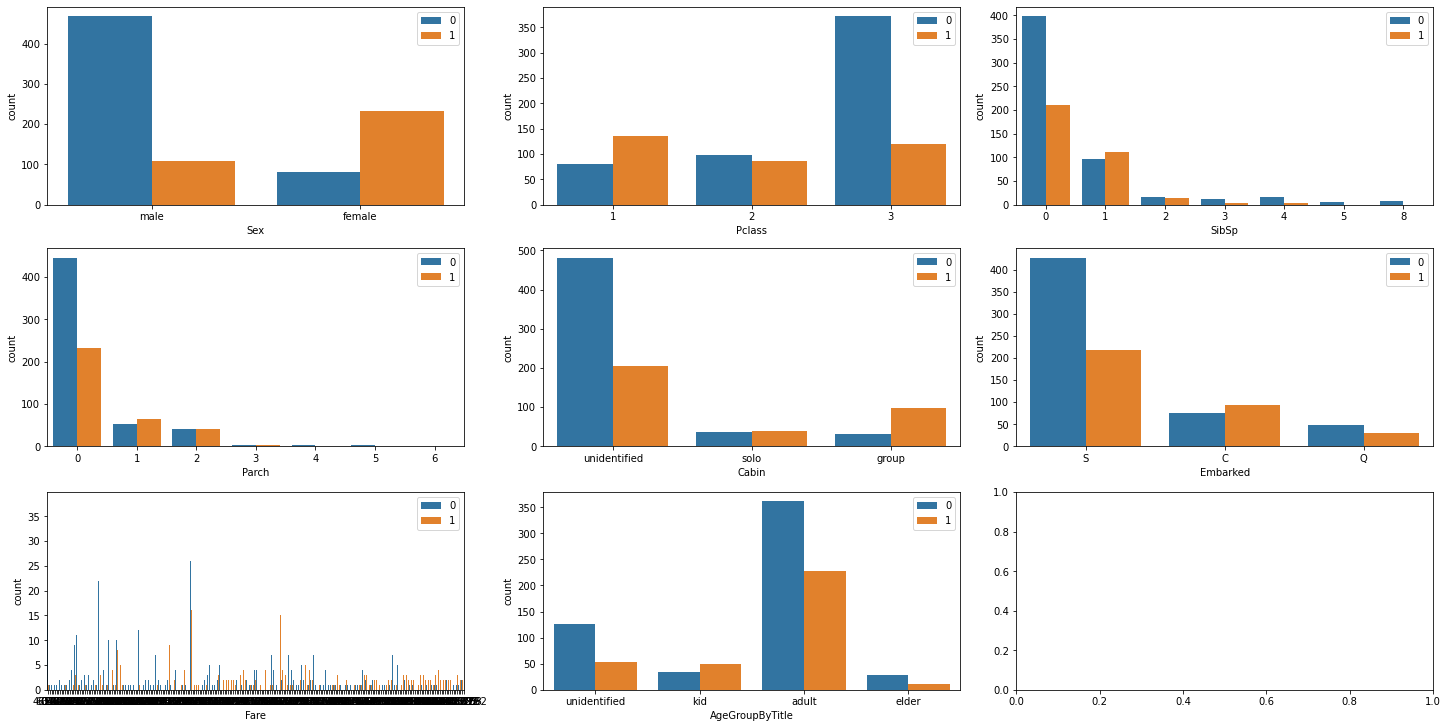

In [85]:
columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare', 'AgeGroupByTitle']

fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(20,10))
for i, col in enumerate(columns) :
    if (i == 8):
        break
    sns.countplot(x=train_input[col], hue=train_input["Survived"], ax=axes[int(i / 3), int(i % 3)])
    axes[int(i / 3), int(i % 3)].legend(loc='upper right')

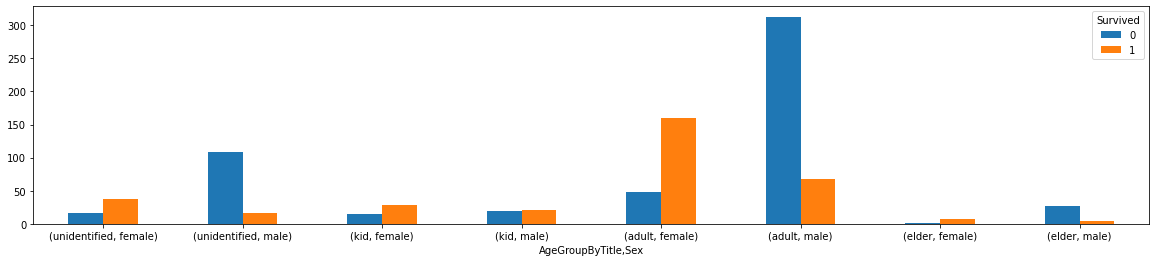

In [86]:
train_input.groupby(['AgeGroupByTitle', 'Sex', 'Survived'])['PassengerId'].count().unstack('Survived') \
    .plot(kind='bar', rot=0, figsize=(20, 4))

Text(0.5, 0, 'Fare (10$)')

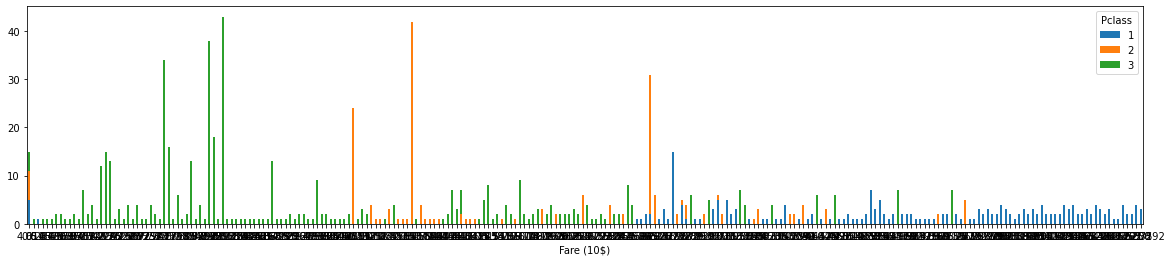

In [87]:
train_input.groupby(['Fare', 'Pclass'])['Fare'].count().unstack('Pclass') \
    .plot(kind='bar', rot=0, stacked=True, figsize=(20, 4)) \
    .set_xlabel("Fare (10$)")

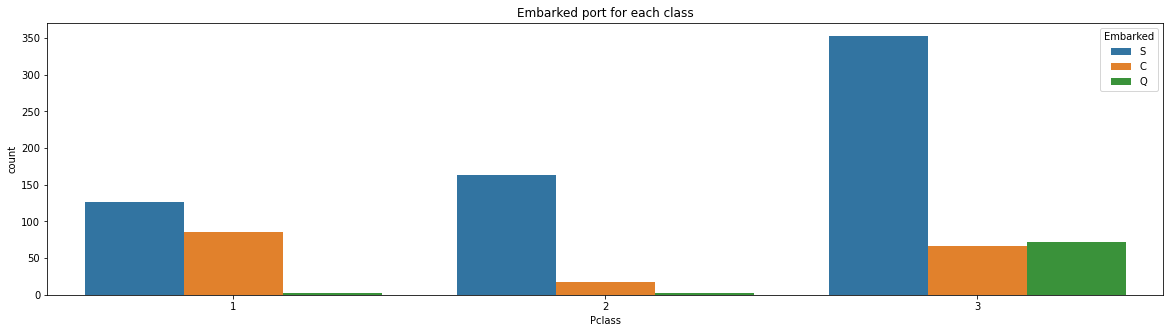

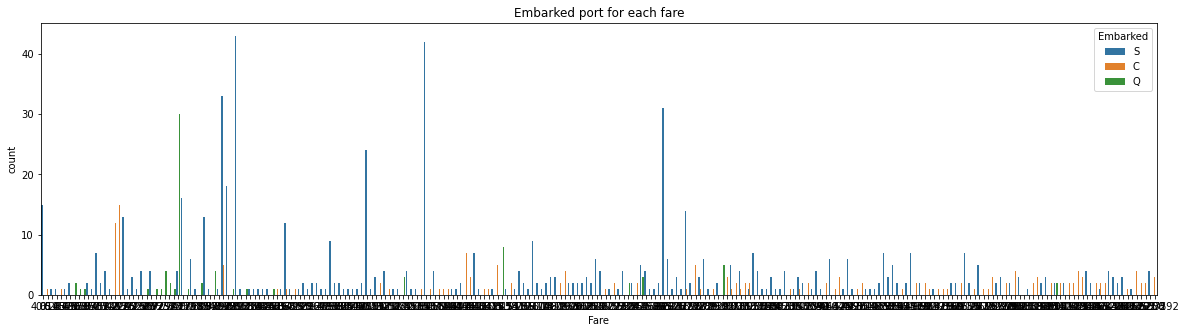

In [88]:
plt.figure(figsize=(20, 5))
plt.title('Embarked port for each class')
sns.countplot(x='Pclass', hue='Embarked', data=train_input)
plt.figure(figsize=(20, 5))
plt.title('Embarked port for each fare')
sns.countplot(x='Fare', hue='Embarked', data=train_input)

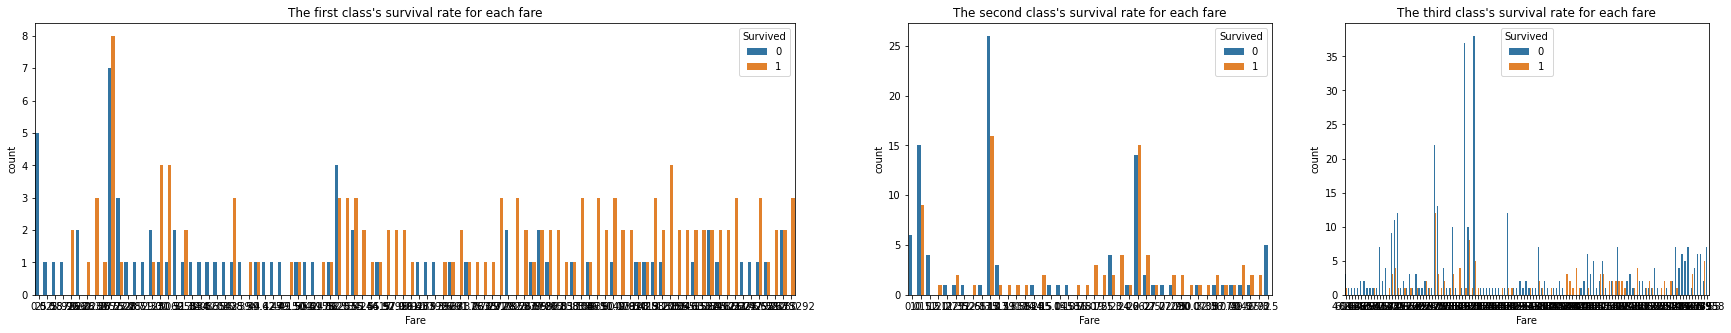

In [89]:
fig, axes = plt.subplots(1,4, figsize=(30, 5))
big_ax = fig.add_subplot(1,2,1)
fig.delaxes(axes[0])
fig.delaxes(axes[1])
big_ax.set_title("The first class's survival rate for each fare")
sns.countplot(x='Fare', hue='Survived', data=train_input[train_input['Pclass'] == 1], ax=big_ax)
axes[2].set_title("The second class's survival rate for each fare")
sns.countplot(x='Fare', hue='Survived', data=train_input[train_input['Pclass'] == 2], ax=axes[2])
axes[3].set_title("The third class's survival rate for each fare")
sns.countplot(x='Fare', hue='Survived', data=train_input[train_input['Pclass'] == 3], ax=axes[3])

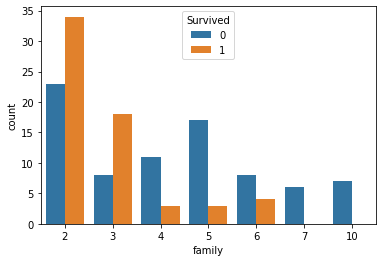

In [90]:
df2 = train_input[(train_input['SibSp'] > 0) & (train_input['Parch'] > 0)]
df2['family'] = (df2['SibSp'] + df2['Parch'])
sns.countplot(x='family', hue='Survived', data=df2)